In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

In [2]:
X, y = make_blobs(centers=2, random_state=42)
X = tf.constant(X, dtype=np.float64)
y = tf.constant(y.reshape(-1, 1), dtype=np.float64)

In [3]:
np.shape(X)

TensorShape([100, 2])

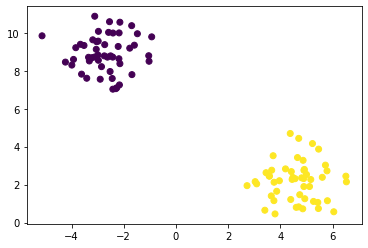

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y.numpy().flatten())

In [5]:
ones = tf.ones((X.shape[0], 1), dtype=np.float64)

X_mod = tf.concat([ones, X], axis=1)

In [6]:
X_mod.shape

TensorShape([100, 3])

In [7]:
np.shape(y)

TensorShape([100, 1])

In [8]:
W = tf.Variable(tf.zeros([X_mod.shape[1], 1], dtype=np.float64))
b = tf.Variable(0., dtype=np.float64)

In [9]:
#training info
train_steps = 300
learning_rate = 0.1

In [10]:
#watch the gradient flow
@tf.function  # Make it fast.
def train_on_batch(X, y):
    with tf.GradientTape() as tape:
        #forward pass 
        z = tf.matmul(X_mod, W) + b
        yhat = tf.sigmoid(z)
        #calcuate the loss (difference squared error)
        error = -(y*tf.math.log(yhat) + (1- y)*tf.math.log(1-yhat))
        loss = tf.reduce_mean(error)

    #evalute the gradient with the respect to the paramters
    dW, db = tape.gradient(loss, [W, b])

    #update the paramters using Gradient Descent  
    W.assign_sub(dW * learning_rate)
    b.assign_sub(db * learning_rate)

    return(loss)

In [11]:
#print the loss every 20 iterations
for i in range(train_steps):
    loss = train_on_batch(X,y)
    
    if i % 20 == 0:
        print("Loss at step {:03d}: {:.3f}".format(i, loss))
        
print(f'W : {W.numpy()} , b  = {b.numpy()} ')

Loss at step 000: 0.693
Loss at step 020: 0.034
Loss at step 040: 0.018
Loss at step 060: 0.013
Loss at step 080: 0.010
Loss at step 100: 0.008
Loss at step 120: 0.007
Loss at step 140: 0.006
Loss at step 160: 0.005
Loss at step 180: 0.005
Loss at step 200: 0.004
Loss at step 220: 0.004
Loss at step 240: 0.003
Loss at step 260: 0.003
Loss at step 280: 0.003
W : [[ 0.16754684]
 [ 1.47650068]
 [-0.39795726]] , b  = 0.16754683854404193 


In [12]:
loss = train_on_batch(X, y)

In [13]:
m, c = -W[0]/W[1], -b/W[1]

In [14]:
x_line = np.linspace(-4, 6, 5)

In [15]:
y_line = m * x_line + c

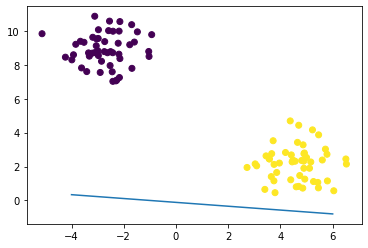

In [16]:
plt.plot(x_line, y_line)
plt.scatter(X[:, 0], X[:, 1], c=y.numpy().flatten())